In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from collections import defaultdict
from matplotlib.ticker import MaxNLocator


from nap_plot_tools.cmap import cat10_mod_cmap, cat10_mod_cmap_first_transparent

np.random.seed(0)

In [2]:
data = np.random.rand(100,2)*6
x = data[:,0]
y = data[:,1]
feature = np.linspace(0, 5, 100)
annotations = np.linspace(0, 5, 100).astype(int)

In [3]:
# sort feature according to x
feature = feature[np.argsort(x)]
feature

array([4.19191919, 0.85858586, 3.18181818, 0.4040404 , 5.        ,
       2.07070707, 0.35353535, 3.68686869, 0.60606061, 3.88888889,
       2.32323232, 3.33333333, 0.65656566, 3.78787879, 1.51515152,
       3.83838384, 4.54545455, 4.84848485, 1.61616162, 4.34343434,
       1.36363636, 1.16161616, 2.72727273, 4.94949495, 2.62626263,
       0.75757576, 1.91919192, 2.37373737, 1.96969697, 1.21212121,
       2.02020202, 2.27272727, 4.44444444, 1.01010101, 4.7979798 ,
       3.98989899, 0.1010101 , 3.13131313, 3.58585859, 0.15151515,
       2.77777778, 0.80808081, 0.55555556, 1.46464646, 4.29292929,
       0.70707071, 2.17171717, 4.6969697 , 0.        , 2.12121212,
       0.3030303 , 3.38383838, 1.26262626, 3.43434343, 2.22222222,
       4.5959596 , 2.42424242, 2.67676768, 0.05050505, 0.90909091,
       3.28282828, 3.48484848, 1.41414141, 1.56565657, 3.23232323,
       1.11111111, 2.52525253, 4.04040404, 1.06060606, 2.82828283,
       4.49494949, 3.73737374, 4.09090909, 3.03030303, 4.24242

In [4]:
x

array([3.29288102, 3.61658026, 2.5419288 , 2.62552327, 5.78197656,
       4.75035023, 3.40826737, 0.42621635, 0.12131038, 4.66894051,
       5.87171005, 2.76887617, 0.70964656, 0.86011972, 3.13108993,
       1.58733367, 2.73690199, 0.1127388 , 3.67257434, 5.66248847,
       2.1570474 , 4.18578718, 4.00060029, 1.26229537, 1.89257011,
       3.42118062, 5.93024303, 1.25326054, 3.91864995, 2.79786464,
       0.9538175 , 3.93797754, 1.17949417, 4.92595938, 5.02766944,
       5.85875679, 5.86056653, 4.43558148, 1.69684178, 1.77684119,
       1.90789908, 0.38488498, 3.39960873, 3.13948832, 3.45567897,
       1.91141371, 0.79078717, 1.73643656, 3.51907761, 4.97364018,
       4.06689922, 4.41116413, 1.49251886, 3.55225159, 1.3384898 ,
       2.68275227, 4.19687565, 4.88278692, 5.28661918, 5.29041217,
       4.35152568, 5.73650181, 2.54313029, 0.11515919, 3.96104122,
       3.70809257, 0.81284439, 3.41978946, 3.44595149, 3.91261962,
       5.37927958, 2.61518955, 4.83716393, 0.60136132, 4.28544

Make 2D histogram with numpy or matplotlib

In [5]:
histogram, x_edges, y_edges= np.histogram2d(x, y, bins=10)


In [6]:
X, Y = np.meshgrid(x_edges, y_edges)

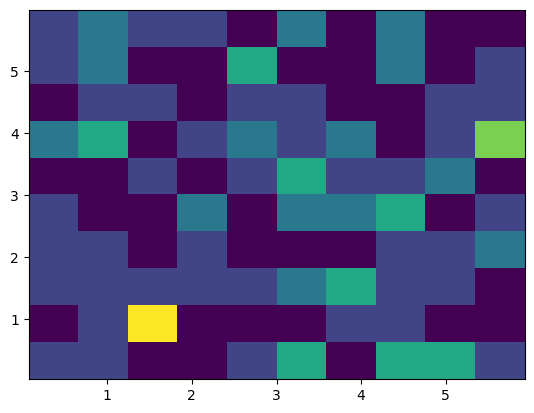

In [7]:
mpl_hist, _, _, _ = plt.hist2d(x, y, bins=10)

In [8]:
x_edges.shape

(11,)

In [9]:
x_edges

array([0.07028451, 0.65628036, 1.24227621, 1.82827206, 2.41426791,
       3.00026377, 3.58625962, 4.17225547, 4.75825132, 5.34424718,
       5.93024303])

In [10]:
histogram.shape

(10, 10)

In [11]:
y.max()

5.993082039407199

(100, 4)
(100, 4)


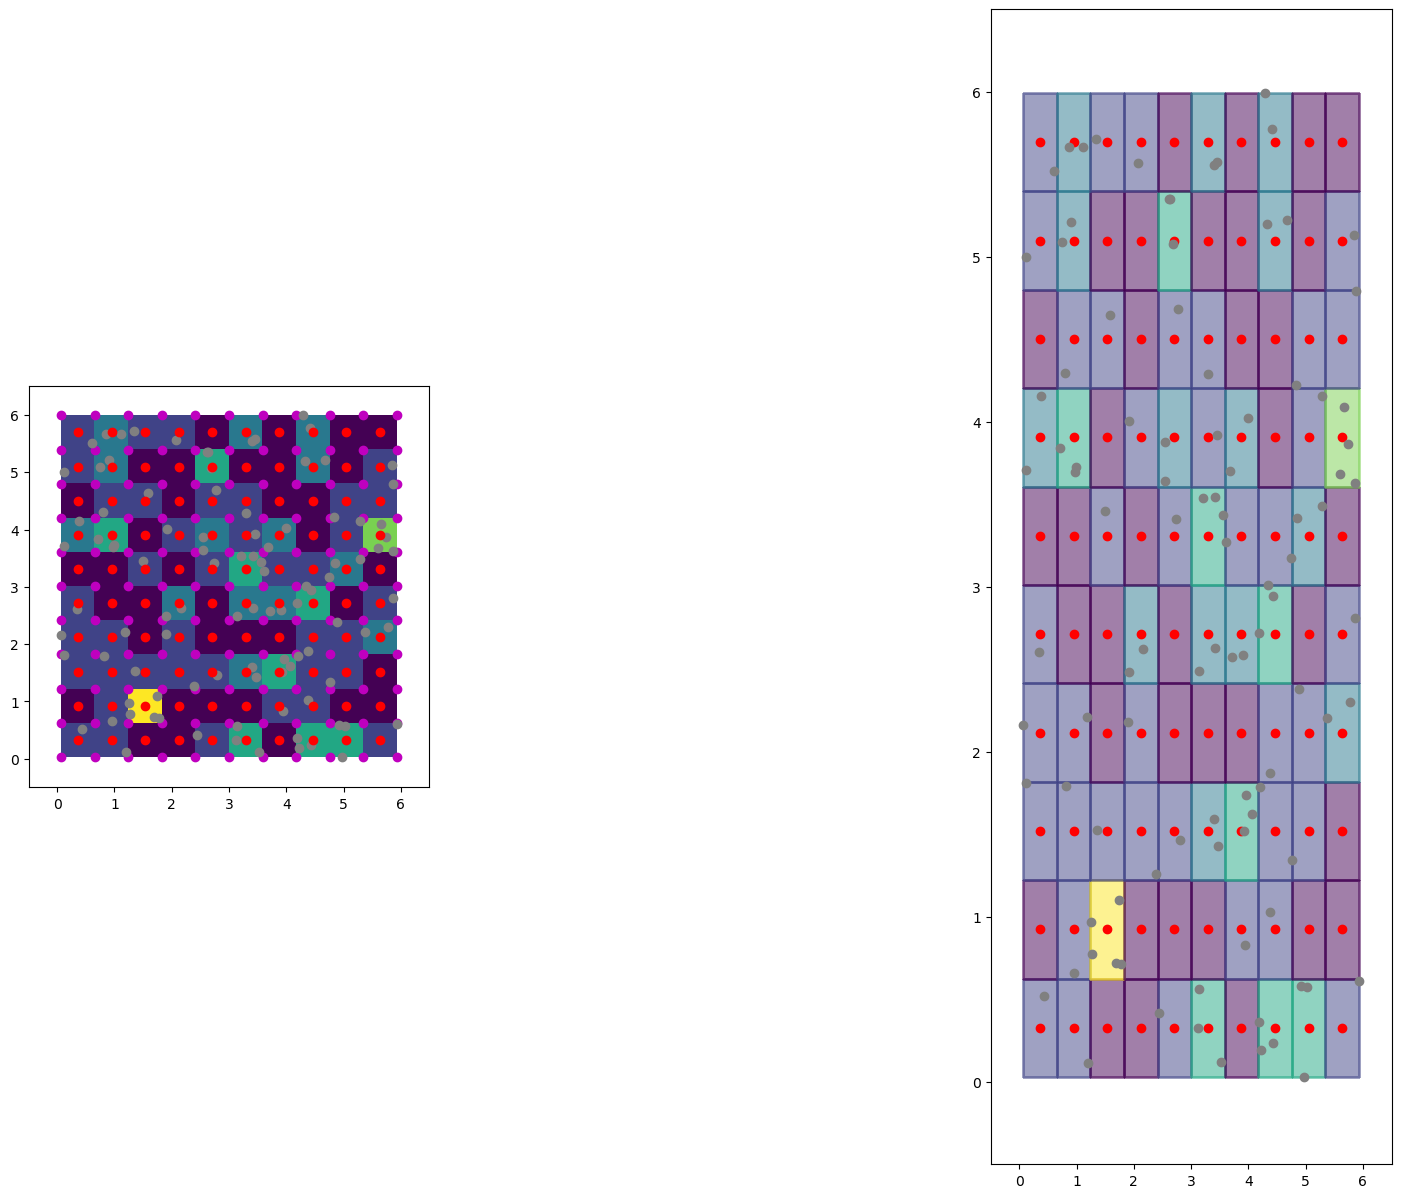

In [44]:
def _annotate(ax, x, y, title="", color='m'):
    # this all gets repeated below:
    X, Y = np.meshgrid(x, y)
    ax.plot(X.flat, Y.flat, 'o', color=color)
    ax.set_xlim(-0.5, 6.5)
    ax.set_ylim(-0.5, 6.5)
    ax.set_title(title)

fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(151, title='imshow: square bins')
plt.imshow(histogram.T, interpolation='nearest', origin='lower',
        extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
_annotate(ax, x_edges, y_edges)
ax.plot(x, y, 'o', color='gray')
# ax.set_xlim([-0.7, 5.2])

# ax = fig.add_subplot(152, title='pcolormesh: actual edges (optionally wioth interpolation/shading)',
#         aspect='equal')
# X, Y = np.meshgrid(x_edges, y_edges)
xcenters = (x_edges[:-1] + x_edges[1:]) / 2
ycenters = (y_edges[:-1] + y_edges[1:]) / 2 
# print(X.shape, Y.shape, histogram.T.shape, xcenters.shape)
# ax.pcolormesh(xcenters, ycenters, histogram.T, shading='nearest', alpha=0.5)
_annotate(ax, xcenters, ycenters, color='r')
# ax.plot(x, y, 'o', color='gray')
# ax.set_xlim(x_edges[[0, -1]])
# ax.set_ylim(y_edges[[0, -1]])


# fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(153, title='imshow: square bins')
# plt.imshow(histogram.T, interpolation='nearest', origin='lower',
#         extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
# _annotate(ax, x_edges, y_edges)
# ax.plot(x, y, 'o', color='gray')

xcenters = (x_edges[:-1] + x_edges[1:]) / 2
ycenters = (y_edges[:-1] + y_edges[1:]) / 2
qm1 = ax.pcolormesh(xcenters, ycenters, histogram.T, shading='nearest', alpha=0.5, visible=True, cmap=plt.cm.viridis)

# Retrieve face colors
facecolors = qm1.get_cmap()(np.ravel(histogram.T))
print(facecolors.shape)
# Set face colors to be fully transparent
qm1.set_facecolor('none')  # Fully transparent white

# # Set edge colors to the original face colors
qm1.set_facecolor(facecolors)
qm1.set_edgecolor('face')
print(qm1.get_edgecolor().shape)

#retrieve rgba values of the quadmesh object
rgbas = qm1.to_rgba(qm1.get_array().reshape(histogram.shape))
# ax.imshow(rgbas, alpha=0.5, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],interpolation='nearest', origin='lower',)
_annotate(ax, xcenters, ycenters, color='r')
ax.plot(x, y, 'o', color='gray')


from matplotlib.image import NonUniformImage, PcolorImage
# ax = fig.add_subplot(153, title='NonUniformImage: interpolated',
#         aspect='equal')
# im = NonUniformImage(ax, interpolation='bilinear', extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]))
# xcenters = (x_edges[:-1] + x_edges[1:]) / 2
# ycenters = (y_edges[:-1] + y_edges[1:]) / 2
# im.set_data(xcenters, ycenters, histogram.T)
# ax.add_image(im)
# ax.set_xlim(x_edges[[0, -1]])
# ax.set_ylim(y_edges[[0, -1]])

# ax = fig.add_subplot(154, title='PcolorImage: interpolated, interpolation not working',
#         aspect='equal')
# im2 = PcolorImage(ax, interpolation='bilinear', interpolation_stage='data', cmap=plt.cm.jet)
# # xcenters = (x_edges[:-1] + x_edges[1:]) / 2
# # ycenters = (y_edges[:-1] + y_edges[1:]) / 2
# im2.set_data(x_edges, y_edges, histogram.T)
# ax.set_xlim(x_edges[[0, -1]])
# ax.set_ylim(y_edges[[0, -1]])
# # im.set_cmap(plt.cm.magma)
# ax.add_image(im2)

# ax = fig.add_subplot(155, title='pcolorfast', aspect='equal')
# c = ax.pcolorfast(X, Y, histogram.T, cmap=plt.cm.jet)

plt.show()

Get the bin index of each element in the 2D histogram accross x and y axis

In [22]:
x_bin_index = (np.digitize(x, x_edges, right=False) - 1).clip(0, len(x_edges)-2) # Get the bin index for each x value ( -1 to start from index 0 and clip to handle edge cases)
y_bin_index = (np.digitize(y, y_edges, right=False) - 1).clip(0, len(y_edges)-2) # Get the bin index for each y value ( -1 to start from index 0 and clip to handle edge cases)

In [23]:
x_bin_index

array([5, 6, 4, 4, 9, 7, 5, 0, 0, 7, 9, 4, 1, 1, 5, 2, 4, 0, 6, 9, 3, 7,
       6, 2, 3, 5, 9, 2, 6, 4, 1, 6, 1, 8, 8, 9, 9, 7, 2, 2, 3, 0, 5, 5,
       5, 3, 1, 2, 5, 8, 6, 7, 2, 5, 2, 4, 7, 8, 8, 8, 7, 9, 4, 0, 6, 6,
       1, 5, 5, 6, 9, 4, 8, 0, 7, 1, 1, 1, 8, 4, 7, 7, 9, 0, 7, 5, 1, 8,
       3, 7, 1, 5, 9, 5, 7, 3, 1, 7, 2, 0], dtype=int64)

In [24]:
y_bin_index

array([7, 5, 6, 8, 3, 5, 9, 0, 8, 8, 7, 7, 6, 9, 4, 7, 5, 6, 6, 6, 4, 0,
       6, 1, 3, 4, 0, 1, 2, 2, 1, 1, 3, 0, 0, 4, 6, 0, 1, 1, 4, 6, 2, 0,
       9, 6, 7, 1, 0, 0, 2, 9, 5, 5, 9, 8, 2, 3, 5, 6, 4, 6, 6, 2, 2, 4,
       2, 5, 6, 4, 3, 8, 7, 9, 9, 8, 6, 8, 5, 0, 4, 8, 8, 3, 1, 0, 0, 2,
       9, 0, 6, 2, 6, 5, 3, 2, 9, 4, 2, 4], dtype=int64)

Re-build the histogram by cumulative sum of the bin indices in the right position

In [25]:
features_histogram = np.zeros((10,10))


In [26]:
for i, j in zip(x_bin_index, y_bin_index):
    features_histogram[i, j] += 1

Check that re-built histogram is the same as the original histogram

In [27]:
np.array_equal(features_histogram, histogram)

True

Build new histogram based on features data

In [48]:
def calculate_statistic_histogram(x_indices, y_indices, features, statistic='sum'):
    """
    Calculate either the mean or median "histogram" for provided indices and features.
    
    Parameters:
    - x_indices: numpy array of x indices
    - y_indices: numpy array of y indices
    - features: numpy array of feature values
    - statistic: 'mean' or 'median', the type of statistic to compute
    
    Returns:
    - 2D numpy array with the calculated statistic
    """
    height = max(x_indices) + 1
    width = max(y_indices) + 1
    statistic_histogram = np.full((height, width), np.nan)  # Initialize with NaNs

    if statistic == 'mean':
        sums = np.zeros((height, width))
        counts = np.zeros((height, width))
        for x, y, feature in zip(x_indices, y_indices, features):
            sums[x, y] += feature
            counts[x, y] += 1
        np.divide(sums, counts, out=statistic_histogram, where=counts != 0)
    elif statistic == 'median':
        feature_lists = defaultdict(list)
        for x, y, feature in zip(x_indices, y_indices, features):
            feature_lists[(x, y)].append(feature)
        for (x, y), feats in feature_lists.items():
            if feats:
                statistic_histogram[x, y] = np.median(feats)
    elif statistic == 'sum':
        sums = np.zeros((height, width))
        for x, y, feature in zip(x_indices, y_indices, features):
            if np.isnan(sums[x, y]):
                sums[x, y] = 0  # Initialize sum as 0 when first feature is added
            sums[x, y] += feature
        statistic_histogram = sums  # No need to handle NaNs separately for sums

    return statistic_histogram

def array_to_rgba(data, colormap=plt.cm.viridis, dtype=float):
    """
    Convert a 2D data array to an RGBA image using a matplotlib colormap.
    
    Parameters:
    - data: 2D numpy array of data values
    - colormap: matplotlib colormap to use
    
    Returns:
    - RGBA image array
    """
    if dtype == int:
        norm = Normalize(vmin=0, vmax=colormap.N)
    elif dtype == float:
        norm = Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data))
    colored_image = colormap(norm(data))
    colored_image[np.isnan(data)] = [0, 0, 0, 0]  # Set NaN values to transparent
    return colored_image.swapaxes(0, 1)

def array_to_nonuniformimage(ax, histogram_data, x_edges, y_edges, colormap=plt.cm.viridis, dtype=float, interpolation='nearest', zorder=1, alpha=1):
    """
    Convert a 2D data array to a NonUniformImage object using a matplotlib colormap.
    """
    if dtype == int:
        norm = Normalize(vmin=0, vmax=colormap.N)
    elif dtype == float:
        norm = Normalize(vmin=np.nanmin(histogram_data), vmax=np.nanmax(histogram_data))
    xcenters = (x_edges[:-1] + x_edges[1:]) / 2
    ycenters = (y_edges[:-1] + y_edges[1:]) / 2
    image = NonUniformImage(ax=ax, interpolation=interpolation, norm=norm, cmap=colormap, extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]), alpha=alpha, zorder=zorder)
    # image.set_zorder(zorder)
    # image.set_alpha(alpha)
    image.set_data(xcenters, ycenters, histogram_data.T)
    return image

def array_to_pcolormesh_rgba(ax, histogram_data, x_edges, y_edges, colormap=plt.cm.viridis, dtype=float):
    """
    Convert a 2D data array to a PcolormeshImage object using a matplotlib colormap.
    """
    if dtype == int:
        norm = Normalize(vmin=0, vmax=colormap.N)
    elif dtype == float:
        norm = Normalize(vmin=np.nanmin(histogram_data), vmax=np.nanmax(histogram_data))
    xcenters = (x_edges[:-1] + x_edges[1:]) / 2
    ycenters = (y_edges[:-1] + y_edges[1:]) / 2
    qm = ax.pcolormesh(xcenters, ycenters, histogram_data.T, shading='nearest', alpha=0.5, visible=True, norm=norm, cmap=colormap)
    #retrieve rgba values of the quadmesh object
    rgba_array = qm.to_rgba(qm.get_array().reshape(histogram_data.shape))
    qm.remove()
    rgba_array[np.isnan(histogram_data)] = [0, 0, 0, 0]  # Set NaN values to transparent
    return rgba_array#.swapaxes(0, 1)


Calculate the histogram using calculate_statistic_histogram function with statistic type 'sum' and features being counts.

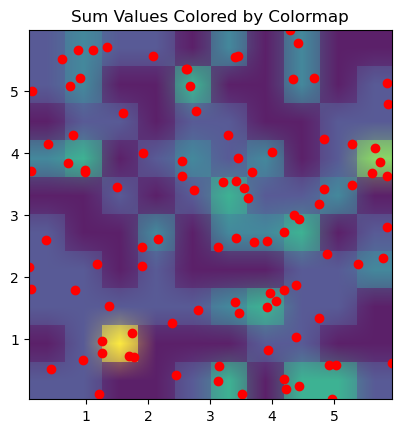

In [51]:
# Calculate the statistic
statistic_type = 'sum'
result = calculate_statistic_histogram(x_bin_index, y_bin_index, np.ones(len(x_bin_index)), statistic=statistic_type)

# Convert array to RGBA image
image2= array_to_rgba(result)



# To display the image and colorbar
fig, ax = plt.subplots()

image4 = array_to_pcolormesh_rgba(ax, result, x_edges, y_edges, colormap=plt.cm.viridis, dtype=float)

image = array_to_nonuniformimage(ax, result, x_edges, y_edges, interpolation='nearest', alpha=0)

# ax.add_image(image)
# ax.set_xlim(x_edges[[0, -1]])
# ax.set_ylim(y_edges[[0, -1]])
plt.title(f"{statistic_type.capitalize()} Values Colored by Colormap")
ax.imshow(image2, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', interpolation='nearest', alpha=0.5)
ax.imshow(image4, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', interpolation='nearest', alpha=0.5)
ax.imshow(image4, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', interpolation='bilinear', alpha=0.5)
ax.plot(x, y, 'o', color='red')
plt.show()

In [17]:
image.remove()

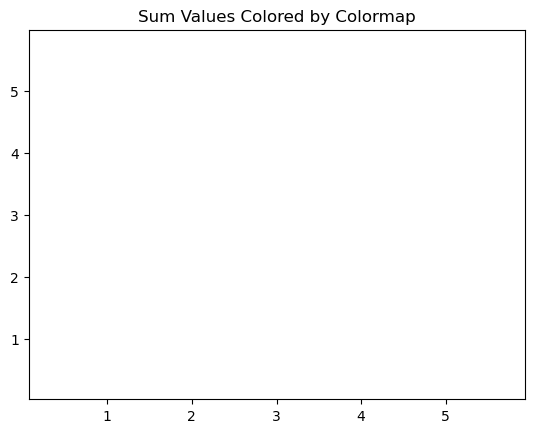

In [18]:
fig

In [ ]:
features_histogram

array([[1., 0., 1., 1., 1., 0., 2., 0., 1., 1.],
       [1., 1., 1., 1., 0., 0., 3., 1., 2., 2.],
       [0., 5., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 1., 2., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 2., 1., 3., 0.],
       [3., 0., 2., 0., 2., 3., 1., 1., 0., 2.],
       [0., 1., 3., 0., 2., 1., 2., 0., 0., 0.],
       [3., 1., 1., 1., 3., 1., 0., 0., 2., 2.],
       [3., 0., 1., 1., 0., 2., 1., 1., 0., 0.],
       [1., 0., 0., 2., 1., 0., 4., 1., 1., 0.]])

In [ ]:
histogram

array([[1., 0., 1., 1., 1., 0., 2., 0., 1., 1.],
       [1., 1., 1., 1., 0., 0., 3., 1., 2., 2.],
       [0., 5., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 1., 2., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 2., 1., 3., 0.],
       [3., 0., 2., 0., 2., 3., 1., 1., 0., 2.],
       [0., 1., 3., 0., 2., 1., 2., 0., 0., 0.],
       [3., 1., 1., 1., 3., 1., 0., 0., 2., 2.],
       [3., 0., 1., 1., 0., 2., 1., 1., 0., 0.],
       [1., 0., 0., 2., 1., 0., 4., 1., 1., 0.]])

In [20]:
result

array([[1., 0., 1., 1., 1., 0., 2., 0., 1., 1.],
       [1., 1., 1., 1., 0., 0., 3., 1., 2., 2.],
       [0., 5., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 1., 2., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 2., 1., 3., 0.],
       [3., 0., 2., 0., 2., 3., 1., 1., 0., 2.],
       [0., 1., 3., 0., 2., 1., 2., 0., 0., 0.],
       [3., 1., 1., 1., 3., 1., 0., 0., 2., 2.],
       [3., 0., 1., 1., 0., 2., 1., 1., 0., 0.],
       [1., 0., 0., 2., 1., 0., 4., 1., 1., 0.]])

Now replace features by float feature column, for example x itself

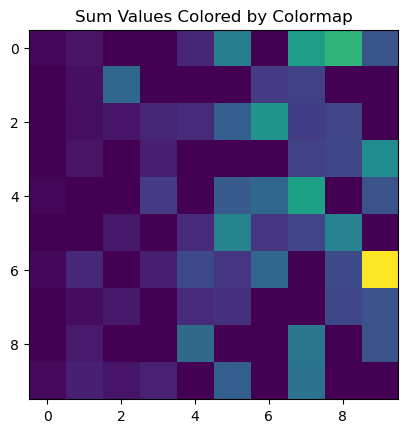

In [21]:
# Calculate the statistic
statistic_type = 'sum'
result = calculate_statistic_histogram(x_bin_index, y_bin_index, x, statistic=statistic_type)

# Convert array to RGBA image
image= array_to_rgba(result)

# To display the image and colorbar
plt.imshow(image)
plt.title(f"{statistic_type.capitalize()} Values Colored by Colormap")
plt.show()

In [29]:
result.max()

22.864840796117875

In [30]:
# array axes are swapped compared to colored_image
result[-1, 6]

22.864840796117875

However, summing x coordinates does not make much sense, so it would be better to use mean or median values of x coordinates.

This will generate a new image (an overlay) colored based on x coordinates.

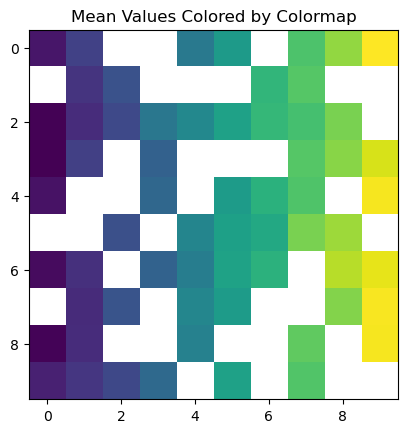

In [31]:
# Calculate the statistic
statistic_type = 'mean'
result = calculate_statistic_histogram(x_bin_index, y_bin_index, x, statistic=statistic_type)

# Convert array to RGBA image
image= array_to_rgba(result)

# To display the image and colorbar
plt.imshow(image)
plt.title(f"{statistic_type.capitalize()} Values Colored by Colormap")
plt.show()

In [32]:
result

array([[0.42621635,        nan, 0.11515919, 0.07028451, 0.34817496,
               nan, 0.24881189,        nan, 0.12131038, 0.60136132],
       [1.19997915, 0.9538175 , 0.81284439, 1.17949417,        nan,
               nan, 0.89092303, 0.79078717, 0.81980486, 0.98863888],
       [       nan, 1.54513508, 1.36448777,        nan,        nan,
        1.49251886,        nan, 1.58733367,        nan, 1.3384898 ],
       [       nan,        nan, 2.38932637, 1.89257011, 2.03247324,
               nan, 1.91141371,        nan,        nan, 2.07211008],
       [2.44309978,        nan, 2.79786464,        nan,        nan,
        2.73690199, 2.54252954, 2.76887617, 2.64115503,        nan],
       [3.26159519,        nan, 3.43149013,        nan, 3.27613528,
        3.39527929, 3.44595149, 3.29288102,        nan, 3.43197317],
       [       nan, 3.93797754, 3.9821968 ,        nan, 3.8103561 ,
        3.61658026, 3.83658731,        nan,        nan,        nan],
       [4.28261835, 4.37994337, 4.1968756

If we have a categorical column with annotations, we can use it to color the overlay. Now, using 'sum' or 'mean' statistic type does not make sense, so we will use 'median' statistic type.

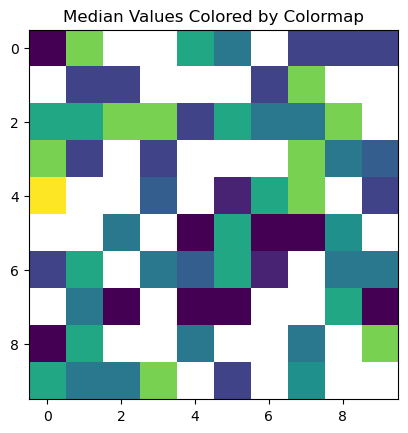

In [38]:
 # Calculate the statistic
statistic_type = 'median'
result = calculate_statistic_histogram(x_bin_index, y_bin_index, annotations, statistic=statistic_type)

# Convert array to RGBA image
image= array_to_rgba(result, colormap=plt.cm.viridis, dtype=float)

# To display the image and colorbar
plt.imshow(image)
plt.title(f"{statistic_type.capitalize()} Values Colored by Colormap")
plt.show()

In [39]:
result

array([[0. , nan, 3. , 4. , 5. , nan, 1. , nan, 0. , 3. ],
       [4. , 1. , 3. , 1. , nan, nan, 3. , 2. , 3. , 2. ],
       [nan, 1. , 4. , nan, nan, 2. , nan, 0. , nan, 2. ],
       [nan, nan, 4. , 1. , 1.5, nan, 2. , nan, nan, 4. ],
       [3. , nan, 1. , nan, nan, 0. , 1.5, 0. , 2. , nan],
       [2. , nan, 3. , nan, 0.5, 3. , 3. , 0. , nan, 1. ],
       [nan, 1. , 2. , nan, 3. , 0. , 0.5, nan, nan, nan],
       [1. , 4. , 2. , 4. , 4. , 0. , nan, nan, 2. , 2.5],
       [1. , nan, 4. , 2. , nan, 2.5, 2. , 3. , nan, nan],
       [1. , nan, nan, 1.5, 1. , nan, 2. , 0. , 4. , nan]])

Better to use a categorical colormap in that case. We specify dtype=int for the array_to_rgba function to normalize the colormap to the number of colors in the colormap instead of the maximal annotation value.

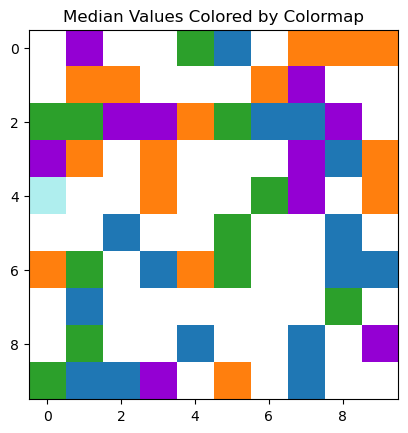

In [40]:
 # Calculate the statistic
statistic_type = 'median'
result = calculate_statistic_histogram(x_bin_index, y_bin_index, annotations, statistic=statistic_type)

# Convert array to RGBA image
image= array_to_rgba(result, colormap=cat10_mod_cmap_first_transparent, dtype=int)

# To display the image and colorbar
plt.imshow(image)
plt.title(f"{statistic_type.capitalize()} Values Colored by Colormap")
plt.show()

In [41]:
result

array([[0. , nan, 3. , 4. , 5. , nan, 1. , nan, 0. , 3. ],
       [4. , 1. , 3. , 1. , nan, nan, 3. , 2. , 3. , 2. ],
       [nan, 1. , 4. , nan, nan, 2. , nan, 0. , nan, 2. ],
       [nan, nan, 4. , 1. , 1.5, nan, 2. , nan, nan, 4. ],
       [3. , nan, 1. , nan, nan, 0. , 1.5, 0. , 2. , nan],
       [2. , nan, 3. , nan, 0.5, 3. , 3. , 0. , nan, 1. ],
       [nan, 1. , 2. , nan, 3. , 0. , 0.5, nan, nan, nan],
       [1. , 4. , 2. , 4. , 4. , 0. , nan, nan, 2. , 2.5],
       [1. , nan, 4. , 2. , nan, 2.5, 2. , 3. , nan, nan],
       [1. , nan, nan, 1.5, 1. , nan, 2. , 0. , 4. , nan]])

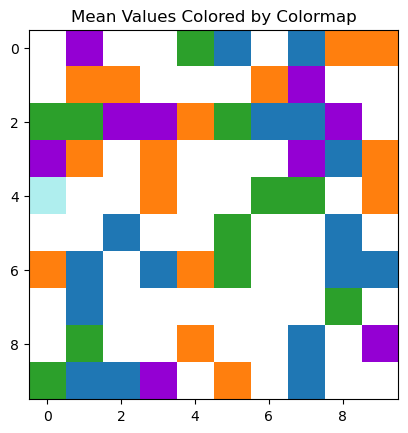

In [42]:
 # Calculate the statistic
statistic_type = 'mean'
result = calculate_statistic_histogram(x_bin_index, y_bin_index, annotations, statistic=statistic_type)

# Convert array to RGBA image
image= array_to_rgba(result, colormap=cat10_mod_cmap_first_transparent, dtype=int)

# To display the image and colorbar
plt.imshow(image)
plt.title(f"{statistic_type.capitalize()} Values Colored by Colormap")
plt.show()

In [43]:
result

array([[0.        ,        nan, 3.        , 4.        , 5.        ,
               nan, 1.        ,        nan, 0.        , 3.        ],
       [4.        , 1.        , 3.        , 1.        ,        nan,
               nan, 2.33333333, 2.        , 3.        , 2.        ],
       [       nan, 1.2       , 4.        ,        nan,        nan,
        2.        ,        nan, 0.        ,        nan, 2.        ],
       [       nan,        nan, 4.        , 1.        , 1.5       ,
               nan, 2.        ,        nan,        nan, 4.        ],
       [3.        ,        nan, 1.        ,        nan,        nan,
        0.        , 1.5       , 0.        , 1.66666667,        nan],
       [2.66666667,        nan, 3.        ,        nan, 0.5       ,
        3.        , 3.        , 0.        ,        nan, 1.        ],
       [       nan, 1.        , 2.        ,        nan, 3.        ,
        0.        , 0.5       ,        nan,        nan,        nan],
       [2.        , 4.        , 2.       

Sum makes no sense for annotations, so let's replace it by the median value

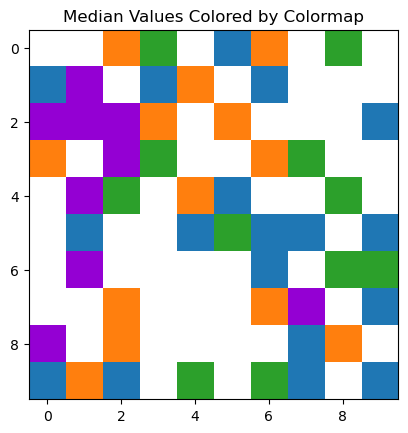

In [31]:
# Calculate the statistic
statistic_type = 'median'
result = calculate_statistic_histogram(x_bin_index, y_bin_index, annotations, statistic=statistic_type)

# Convert array to RGBA image
image= array_to_rgba(result, colormap=cat10_mod_cmap_first_transparent, dtype=int)

# To display the image and colorbar
plt.imshow(image)
plt.title(f"{statistic_type.capitalize()} Values Colored by Colormap")
plt.show()

In [32]:
result

array([[nan, nan, 1. , 3. , nan, 2. , 1. , nan, 3. , 0. ],
       [2. , 4. , nan, 2.5, 1. , 0. , 2. , nan, 0. , nan],
       [4. , 4. , 4. , 1.5, nan, 1. , nan, nan, nan, 2. ],
       [1. , 0. , 4. , 3. , 0. , nan, 1. , 3. , 0. , 0.5],
       [nan, 4. , 3.5, nan, 1. , 2.5, nan, 0. , 3. , nan],
       [nan, 2. , nan, nan, 2. , 3. , 2. , 2. , nan, 2.5],
       [0. , 4. , nan, nan, nan, nan, 2.5, nan, 3. , 3. ],
       [nan, nan, 1. , nan, nan, nan, 1.5, 4. , 0. , 2.5],
       [4. , nan, 1. , nan, 0. , nan, nan, 2. , 1.5, nan],
       [2. , 1. , 2.5, nan, 3.5, nan, 3. , 2. , 0. , 2. ]])

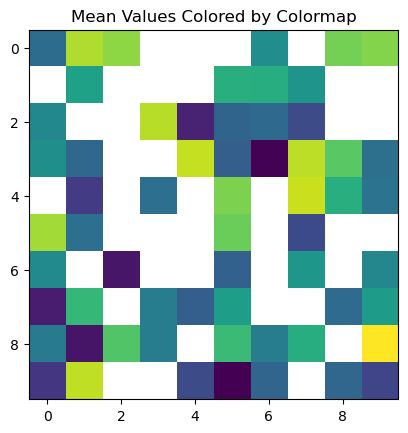

In [200]:
# Calculate the statistic
statistic_type = 'mean'
result = calculate_statistic_histogram(x_bin_index, y_bin_index, feature, statistic=statistic_type)

# Convert array to RGBA image
image= array_to_rgba(result)

# To display the image and colorbar
plt.imshow(image)
plt.title(f"{statistic_type.capitalize()} Values Colored by Colormap")
plt.show()

In [201]:
result



array([[2.42772326, 5.28686391, 5.02130818,        nan,        nan,
               nan, 3.1657968 ,        nan, 4.81065492, 4.93518501],
       [       nan, 3.62450468,        nan,        nan,        nan,
        3.93187409, 3.89858028, 3.32091649,        nan,        nan],
       [3.04004716,        nan,        nan, 5.36726395, 1.04162495,
        2.25505975, 2.35814875, 1.78191427,        nan,        nan],
       [3.22597568, 2.33301908,        nan,        nan, 5.46954134,
        2.14723662, 0.54977792, 5.39933794, 4.54929736, 2.50869049],
       [       nan, 1.48345153,        nan, 2.49431005,        nan,
        4.8637746 ,        nan, 5.51196903, 3.92434983, 2.58214555],
       [5.18157359, 2.49789784,        nan,        nan,        nan,
        4.71569884,        nan, 1.72945875,        nan,        nan],
       [3.09353332,        nan, 0.84198435,        nan,        nan,
        2.19892797,        nan, 3.38236632,        nan, 3.03585469],
       [0.91807179, 4.13091377,        na

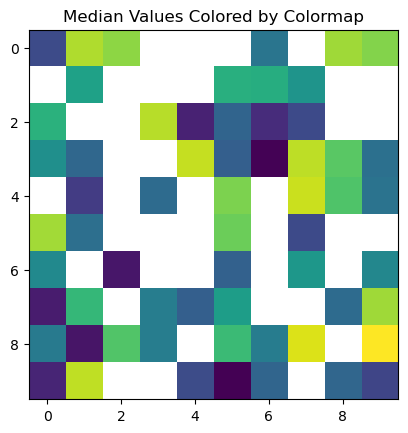

In [202]:
# Calculate the statistic
statistic_type = 'median'
result = calculate_statistic_histogram(x_bin_index, y_bin_index, feature, statistic=statistic_type)

# Convert array to RGBA image
image= array_to_rgba(result)

# To display the image and colorbar
plt.imshow(image)
plt.title(f"{statistic_type.capitalize()} Values Colored by Colormap")
plt.show()

In [203]:
result

array([[1.75220646, 5.28686391, 5.02130818,        nan,        nan,
               nan, 2.62410144,        nan, 5.16229321, 4.93518501],
       [       nan, 3.62450468,        nan,        nan,        nan,
        3.93187409, 3.89858028, 3.32091649,        nan,        nan],
       [3.98601494,        nan,        nan, 5.36726395, 1.04162495,
        2.25505975, 1.20914453, 1.72978804,        nan,        nan],
       [3.22597568, 2.33301908,        nan,        nan, 5.46954134,
        2.14723662, 0.54977792, 5.39933794, 4.54929736, 2.50869049],
       [       nan, 1.48345153,        nan, 2.40270899,        nan,
        4.8637746 ,        nan, 5.51196903, 4.4514392 , 2.58214555],
       [5.18157359, 2.49789784,        nan,        nan,        nan,
        4.71569884,        nan, 1.72945875,        nan,        nan],
       [3.09353332,        nan, 0.84198435,        nan,        nan,
        2.19892797,        nan, 3.38236632,        nan, 3.03585469],
       [0.91807179, 4.13091377,        na